In [171]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

# Chart Kontrol

In [165]:
df = pl.read_excel("tabel_2_1.xlsx")
df

no_sampel,x_mean,R,std_dev
i64,f64,f64,f64
1,2.38,1.1,0.4
2,2.5,1.0,0.32
3,2.16,0.7,0.26
4,2.22,0.6,0.22
5,2.42,0.7,0.25
…,…,…,…
16,2.3,0.9,0.32
17,2.42,0.4,0.52
18,2.5,0.2,0.09


## Chart Kontrol untuk $\overline{x} $

In [213]:
# Helper Function 1
def stats_mean(data):
    mean_x_bar = df.select([pl.mean("x_mean")])[0,0]
    mean_R = df.select([pl.mean("R")])[0,0]
    mean_std_dev = df.select([pl.mean("std_dev")])[0,0]
    return mean_x_bar, mean_R, mean_std_dev

x, r, s = stats_mean(data=df)

print(f"mean_x_bar\t= {x}\nmean_R\t\t= {r}\nmean_std_dev\t= {s}")

mean_x_bar	= 2.331
mean_R		= 0.725
mean_std_dev	= 0.2775


0.2775


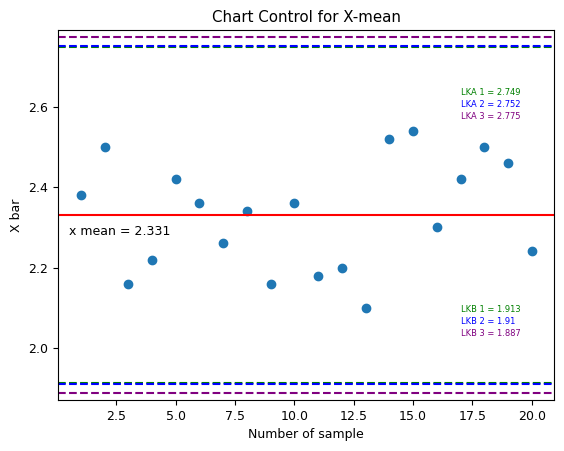

In [211]:
# Cara ke-1
def cc_x(data, d2, a1, a2, n):
    x, r, s = stats_mean(data)
    rang = r/d2/(np.sqrt(n))
    lka_1 = x + 3*rang
    lkb_1 = x - 3*rang
    lka_2 = x + a2*r
    lkb_2 = x - a2*r
    lka_3 = x + a1*s
    lkb_3 = x - a1*s
    
    plt.scatter(data["no_sampel"], data["x_mean"])
    plt.xlabel('Number of sample')
    plt.ylabel('X bar')
    plt.title('Chart Control for X-mean')
    plt.axhline(y=lka_1, color='g', linestyle='--')
    plt.axhline(y=lkb_1, color='g', linestyle='--')
    plt.axhline(y=lka_2, color='b', linestyle='--')
    plt.axhline(y=lkb_2, color='b', linestyle='--')
    plt.axhline(y=lka_3, color='purple', linestyle='--')
    plt.axhline(y=lkb_3, color='purple', linestyle='--')
    plt.axhline(y=x, color='r', linestyle='solid')
    plt.text(0.5, x-0.05, f'x mean = {round(x,3)}')
    plt.text(17, x+0.3, f'LKA 1 = {round(lka_1,3)}', fontsize=6, color="g")
    plt.text(17, x-0.24, f'LKB 1 = {round(lkb_1,3)}', fontsize=6, color="g")
    plt.text(17, x+0.27, f'LKA 2 = {round(lka_2,3)}', fontsize=6, color="b")
    plt.text(17, x-0.27, f'LKB 2 = {round(lkb_2,3)}', fontsize=6, color="b")
    plt.text(17, x+0.24, f'LKA 3 = {round(lka_3,3)}', fontsize=6, color="purple")
    plt.text(17, x-0.3, f'LKB 3 = {round(lkb_3,3)}', fontsize=6, color="purple")
    plt.show()



cc_x(data=df, d2=2.326, a1=1.6, a2=0.58, n=5)

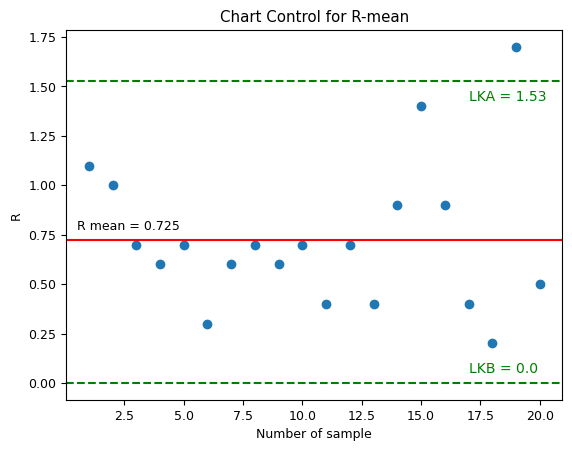

In [223]:
def cc_r(data, d3, d4):
    x, r, s = stats_mean(data)
    lka = r*d4
    lkb = r*d3
    
    plt.scatter(data["no_sampel"], data["R"])
    plt.xlabel('Number of sample')
    plt.ylabel('R')
    plt.title('Chart Control for R-mean')
    plt.axhline(y=lka, color='g', linestyle='--')
    plt.axhline(y=lkb, color='g', linestyle='--')    
    plt.axhline(y=r, color='r', linestyle='solid')
    plt.text(0.5, r+0.05, f'R mean = {round(r,3)}')
    plt.text(17, lka-0.1, f'LKA = {round(lka,3)}', fontsize=10, color="g")
    plt.text(17, lkb+0.05, f'LKB = {round(lkb,3)}', fontsize=10, color="g")    
    plt.show()

cc_r(data=df, d3=0, d4=2.11)

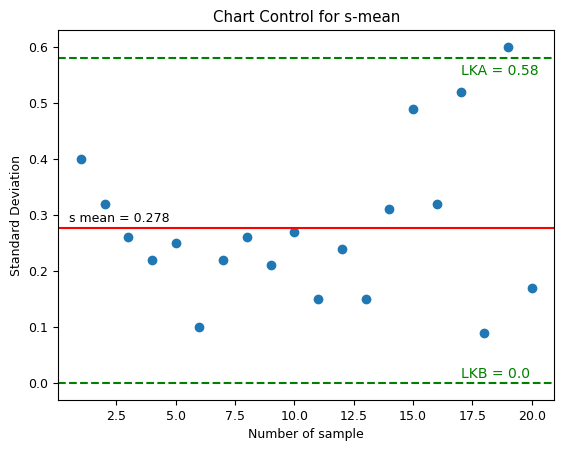

In [231]:
def cc_s(data, b3, b4):
    x, r, s = stats_mean(data)
    lka = s*b4
    lkb = s*b3
    
    plt.scatter(data["no_sampel"], data["std_dev"])
    plt.xlabel('Number of sample')
    plt.ylabel('Standard Deviation')
    plt.title('Chart Control for s-mean')
    plt.axhline(y=lka, color='g', linestyle='--')
    plt.axhline(y=lkb, color='g', linestyle='--')    
    plt.axhline(y=s, color='r', linestyle='solid')
    plt.text(0.5, s+0.01, f's mean = {round(s,3)}')
    plt.text(17, lka-0.03, f'LKA = {round(lka,3)}', fontsize=10, color="g")
    plt.text(17, lkb+0.01, f'LKB = {round(lkb,3)}', fontsize=10, color="g")    
    plt.show()

cc_s(data=df, b3=0, b4=2.09)